In [1]:
# data analysis and wrangling

import pandas as pd
import numpy as np
import random as rnd

In [2]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

1.Data acquisition of the movielens dataset 

In [3]:
#Data acquisition of the movies dataset

movie=pd.read_csv('movies.dat', sep = '::', engine='python')
movie.columns =['Movie_IDs','Movie_Name','Category']
movie.dropna(inplace=True)
movie.head()

,Movie_IDs,Movie_Name,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
movie.describe()

,Movie_IDs
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [5]:
movie.shape

(3882, 3)

In [6]:
movie.columns

Index(['Movie_IDs', 'Movie_Name', 'Category'], dtype='object')

In [7]:
#show that no columns are empty or null.

movie.isnull().sum()

Movie_IDs     0
Movie_Name    0
Category      0
dtype: int64

In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_IDs   3882 non-null   int64 
 1   Movie_Name  3882 non-null   object
 2   Category    3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [9]:
#Data acquisition of the rating dataset

rating = pd.read_csv("ratings.dat",sep='::', engine='python')
rating.columns =['User_ID','Movie_ID','Ratings','TimeStamp']
rating.dropna(inplace=True)
rating.head()

,User_ID,Movie_ID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [10]:
rating.describe()

,User_ID,Movie_ID,Ratings,TimeStamp
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [11]:
rating.shape

(1000208, 4)

In [12]:
rating.columns

Index(['User_ID', 'Movie_ID', 'Ratings', 'TimeStamp'], dtype='object')

In [13]:
#show that no columns are empty or null.

rating.isnull().sum()

User_ID      0
Movie_ID     0
Ratings      0
TimeStamp    0
dtype: int64

In [14]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000208 entries, 0 to 1000207
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   User_ID    1000208 non-null  int64
 1   Movie_ID   1000208 non-null  int64
 2   Ratings    1000208 non-null  int64
 3   TimeStamp  1000208 non-null  int64
dtypes: int64(4)
memory usage: 38.2 MB


In [15]:
#Data acquisition of the users dataset

user = pd.read_csv("users.dat",sep='::',engine='python')
user.columns =['User_ID','Gender','Age','Occupation','Zip-code']
user.dropna(inplace=True)
user.head()

,User_ID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [16]:
user.describe()

,User_ID,Age,Occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [17]:
user.shape

(6039, 5)

In [18]:
user.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [19]:
#show that no columns are empty or null.

user.isnull().sum()

User_ID       0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [20]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6039 entries, 0 to 6038
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_ID     6039 non-null   int64 
 1   Gender      6039 non-null   object
 2   Age         6039 non-null   int64 
 3   Occupation  6039 non-null   int64 
 4   Zip-code    6039 non-null   object
dtypes: int64(3), object(2)
memory usage: 283.1+ KB


In [21]:
data = pd.concat([movie,rating,user], axis=1)
data.head()

,Movie_IDs,Movie_Name,Category,User_ID,Movie_ID,Ratings,TimeStamp,User_ID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


2.Perform the Exploratory Data Analysis (EDA) for the users dataset 

In [22]:
#Visualize user age distribution

groupby_age=user.groupby('Age').size()
groupby_age

Age
1      221
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

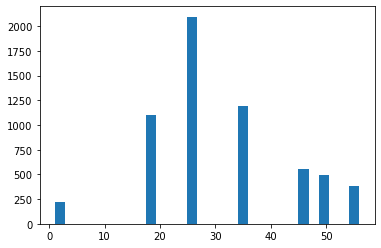

In [23]:
plt.hist(x=user['Age'],bins=30)
plt.show()

The above age distribution shows that most of the users are 25 years old.

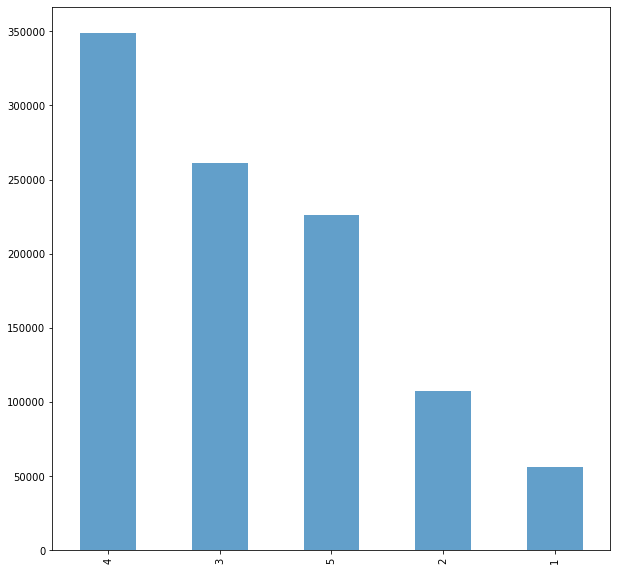

In [24]:
#Visualize overall rating by users

data['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

The above age distribution shows that highest user rating is 4 stars.

In [25]:
#Find and visualize the user rating of the movie “Toy Story”

toystory_data=rating[rating.Movie_ID==1]
toystory_data.head(10)
                    

,User_ID,Movie_ID,Ratings,TimeStamp
39,1,1,5,978824268
468,6,1,4,978237008
580,8,1,4,978233496
710,9,1,5,978225952
836,10,1,5,978226474
1965,18,1,4,978154768
2275,19,1,5,978555994
2529,21,1,3,978139347
2869,23,1,4,978463614
3404,26,1,3,978130703


In [26]:
toystory_data.groupby('Ratings').size()

Ratings
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [27]:
groupby_toystory_data=toystory_data.groupby('Ratings')
groupby_toystory_data.agg({'Ratings':'mean'})

,Ratings
Ratings,
1,1
2,2
3,3
4,4
5,5


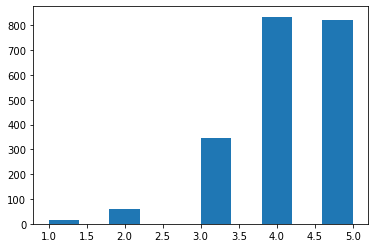

In [28]:
plt.hist(x=toystory_data['Ratings'])
plt.show()

The above plot shows that the movie 'Toystory' has got 4 stars maximum

In [29]:
#Find and visualize the viewership of the movie “Toy Story” by age group

viewership=pd.merge(rating,user,left_on='User_ID',right_on='User_ID')
viewership.head()

,User_ID,Movie_ID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,2,1357,5,978298709,M,56,16,70072
1,2,3068,4,978299000,M,56,16,70072
2,2,1537,4,978299620,M,56,16,70072
3,2,647,3,978299351,M,56,16,70072
4,2,2194,4,978299297,M,56,16,70072


In [30]:
viewership.shape

(1000156, 8)

In [31]:
#only toystory data
viewership_toystory=viewership[viewership['Movie_ID']==1]
viewership_toystory.head()

,User_ID,Movie_ID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
416,6,1,4,978237008,F,50,9,55117
528,8,1,4,978233496,M,25,12,11413
658,9,1,5,978225952,M,25,17,61614
784,10,1,5,978226474,F,35,1,95370
1913,18,1,4,978154768,F,18,3,95825


In [32]:
viewership_toystory.shape

(2076, 8)

In [33]:
viewership_toystory.groupby("Age").size()

Age
1     111
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

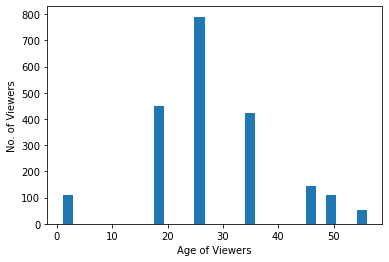

In [34]:
plt.hist(x=viewership_toystory['Age'],bins=30)
plt.xlabel("Age of Viewers")
plt.ylabel("No. of Viewers")
plt.show()

The above plot shows that the Toystory movie is more popular for viewers between age group 20-25 years

In [35]:
#Find and visualize the top 25 movies by viewership rating

movie_rating=rating.groupby(['Movie_ID'],as_index=False)
avg_movie_rating=movie_rating.agg({'Ratings':'mean'})
top_25_movies=avg_movie_rating.sort_values('Ratings',ascending=False).head(25)
top_25_movies

,Movie_ID,Ratings
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [36]:
top_25_movies_viewership_data=pd.merge(top_25_movies,movie,left_on=['Movie_ID'],right_on=['Movie_IDs'])
top_25_movies_viewership_data

,Movie_ID,Ratings,Movie_IDs,Movie_Name,Category
0,989,5.000000,989,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,3881,Bittersweet Motel (2000),Documentary
2,1830,5.000000,1830,Follow the Bitch (1998),Comedy
3,3382,5.000000,3382,Song of Freedom (1936),Drama
4,787,5.000000,787,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,3280,"Baby, The (1973)",Horror
6,3607,5.000000,3607,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,3233,Smashing Time (1967),Comedy
8,3172,5.000000,3172,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,3656,Lured (1947),Crime


In [37]:
#Find the rating for a particular user of user id = 2696

userid_2696 = rating[rating['User_ID']==2696]
userid_2696.head()

,User_ID,Movie_ID,Ratings,TimeStamp
440666,2696,1258,4,973308710
440667,2696,1270,2,973308676
440668,2696,1617,4,973308842
440669,2696,1625,4,973308842
440670,2696,1644,2,973308920


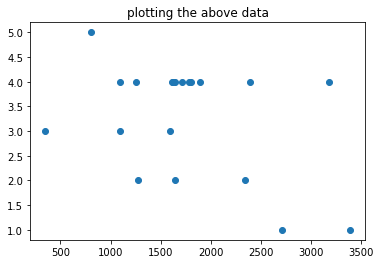

In [38]:
#plotting the above data

plt.title('plotting the above data')
plt.scatter(x=userid_2696['Movie_ID'],y=userid_2696['Ratings'])
plt.show()

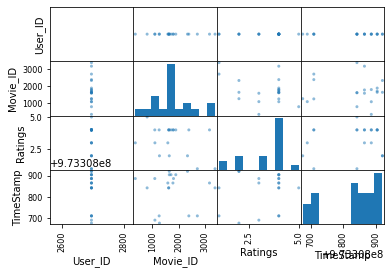

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(userid_2696)
plt.show()

Perform machine learning on first 500 extracted records 


In [40]:
sam_viewership=viewership.head(500)
sam_viewership.head()

,User_ID,Movie_ID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,2,1357,5,978298709,M,56,16,70072
1,2,3068,4,978299000,M,56,16,70072
2,2,1537,4,978299620,M,56,16,70072
3,2,647,3,978299351,M,56,16,70072
4,2,2194,4,978299297,M,56,16,70072


In [41]:
sam_viewership.shape

(500, 8)

Data Preprocess

In [42]:
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [43]:
#Feature for MovieID

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le.fit(sam_viewership['Movie_ID'])
x_movieid=le.transform(sam_viewership['Movie_ID'])
x_movieid

array([159, 341, 184,  77, 266,  78, 268, 302, 119, 325, 373, 134, 223,
       206, 135, 387, 322, 337, 137, 350,  52, 262, 351, 352, 338, 147,
       194,  36, 267, 342,  91,  47, 148, 355, 185, 156, 125, 360, 361,
       362,  18, 269, 293, 227, 374,  71, 208, 393, 319, 237,  99, 228,
       320, 139, 253,  64,  53, 273,  32, 169, 110, 398,  58, 173, 256,
       150, 160, 128, 225, 161, 279, 366, 288,  72, 129, 186,  83, 131,
        73, 281,  16, 307, 297, 234, 286, 402, 239, 193, 408, 240, 241,
        30, 120, 242,  21,   4,  22, 275, 113,  49, 294,  42,  54, 116,
        97,  55, 181, 370, 165, 372, 348,  84,  60, 311, 249, 245, 221,
       326, 250,  39, 133, 247, 395, 142,  44, 143, 144, 410, 145, 371,
       198,  78, 168, 383,  17, 313, 134, 171, 409, 109, 333, 195, 155,
       148,  79, 264, 191, 391,  31, 320, 354, 108, 149,  66,  58, 150,
       151,  82, 129,  72, 280, 130, 131, 162,  73, 163, 385, 158, 153,
       292, 357, 301, 244, 394, 250, 321, 261, 247, 122, 258, 37

In [44]:
#Feature for Age

le.fit(sam_viewership['Age'])
x_age=le.transform(sam_viewership['Age'])
x_age

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
#Feature for Occupation

le.fit(sam_viewership['Occupation'])
x_occupation=le.transform(sam_viewership['Occupation'])
x_occupation

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [46]:
#Feature selection

sam_viewership['New_MovieID']=x_movieid
sam_viewership['New_Age']=x_age
sam_viewership['New_Occupation']=x_occupation

In [47]:
#Use rating as label 

x_input=sam_viewership[['New_MovieID','New_Age','New_Occupation']]
y_target=sam_viewership['Ratings']

In [48]:
x_input.head()

,New_MovieID,New_Age,New_Occupation
0,159,4,4
1,341,4,4
2,184,4,4
3,77,4,4
4,266,4,4


In [49]:
y_target.head()

0    5
1    4
2    4
3    3
4    4
Name: Ratings, dtype: int64

In [50]:
#Create train and test data set and perform the following: 

x_train,x_test,y_train,y_test=train_test_split(x_input,y_target,test_size=0.25)

In [51]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
lm=logReg.fit(x_train,y_train)

In [52]:
#prediction
result=logReg.predict(x_test)

In [53]:
estimated=pd.Series(result,name='Estimated Values')

In [54]:
final_result=pd.concat([y_test,estimated],axis=1)

In [55]:
#test for evaluation matrix
print(accuracy_score(y_test,result))
print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))

0.288
[[ 0  0  5  2  1]
 [ 0  0  3  8  0]
 [ 0  0  9 18  2]
 [ 0  0 16 25  3]
 [ 0  0 10 21  2]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        11
           3       0.21      0.31      0.25        29
           4       0.34      0.57      0.42        44
           5       0.25      0.06      0.10        33

    accuracy                           0.29       125
   macro avg       0.16      0.19      0.15       125
weighted avg       0.23      0.29      0.23       125



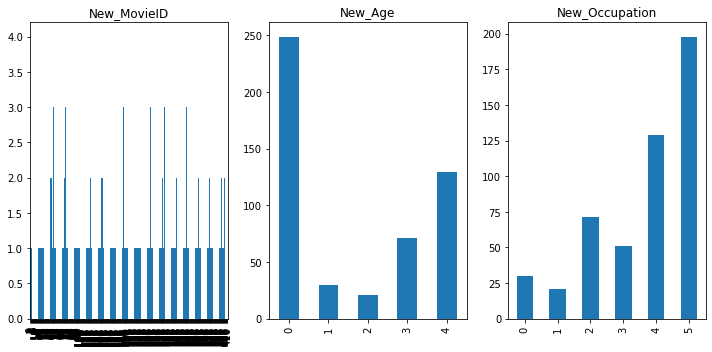

In [56]:
#Create a histogram for movie, age, and occupation 

fig, axes=plt.subplots(ncols=len(x_input.columns),figsize=(10,5))
for col,ax in zip(x_input,axes):
    x_input[col].value_counts().sort_index().plot.bar(ax=ax,title=col)
    
plt.tight_layout()
plt.show()

                 Histogram of movie, Age and Occupation